In [283]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx
import openpyxl
import seaborn as sns
import unidecode

In [505]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
import numpy as np
import mapclassify

In [59]:
df1v = pd.read_excel('../Chile/Elecciones/Presidenciales_1v_2021.xlsx', sheet_name='Hoja1') #datos servel

In [51]:
df2v = pd.read_excel('../Chile/Elecciones/Presidenciales_2v_2021.xlsx', sheet_name='Hoja1') #datos servel

In [512]:
comunas = gpd.read_file('../Chile/Comunas/comunas.shp') #shapefile comunas de Chile

In [513]:
comunas.to_crs(4326, inplace=True) #proyectamos ESPG 4326

In [677]:
regiones = gpd.read_file('../Chile/Regiones/Regional.shp') #shapefile regiones de Chile

In [681]:
regiones.to_crs(4326, inplace=True) #proyectamos ESPG 4326

In [686]:
#regiones norte
regiones_zona1 = regiones.loc[regiones['Region'].isin(['Región de Tarapacá','Región de Arica y Parinacota', 
                           'Región de Antofagasta','Región de Atacama'])]

In [514]:
#descartamos estas 2 comunas para efectos de grafica los mapas
comunas = comunas.loc[~comunas["Comuna"].isin(['Juan Fernández','Isla de Pascua'])]

In [515]:
#seleccionamos las columnas necesarias
df_comunas = comunas[['cod_comuna','Region','Comuna','Provincia','geometry']]

In [516]:
df_comunas['Comuna'] = df_comunas['Comuna'].str.upper() #limpiamos strings

In [517]:
df_comunas['Comuna'] = df_comunas['Comuna'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8') #limpiamos strings

In [519]:
# Desagregamos en 6 zonas para cartografiar adecuadamente

zona1 = df_comunas.loc[df_comunas['Region'].isin(['Región de Tarapacá','Región de Arica y Parinacota', 
                           'Región de Antofagasta','Región de Atacama'])]

In [520]:
zona2 = df_comunas.loc[df_comunas['Region'].isin(['Región de Coquimbo','Región de Valparaíso'])]

In [521]:
zona3 = df_comunas.loc[df_comunas['Region'].isin(['Región Metropolitana de Santiago',
                           "Región del Libertador Bernardo O'Higgins"])]

In [522]:
zona4 = df_comunas.loc[df_comunas['Region'].isin(['Región del Maule','Región de Ñuble',
                                                  'Región del Bío-Bío','Región de La Araucanía'])]

In [523]:
zona5 = df_comunas.loc[df_comunas['Region'].isin(['Región de Los Lagos','Región de Los Ríos'])]

In [524]:
zona6 = df_comunas.loc[df_comunas['Region'].isin(['Región de Aysén del Gral.Ibañez del Campo',                                  
                                                  'Región de Magallanes y Antártica Chilena'])]

In [525]:
df1v['Nro. en Voto'] = df1v['Nro. en Voto'].replace([3,5,6,4],[1,1,1,2]) #traspasamos votos de Artes, Provoste y MEO a Boric y Sichel a Kast

In [526]:
df2 = df1v.groupby(['Comuna','Nro. Mesa','Nro. en Voto']).agg({'Votos TRICEL':'sum'}).reset_index()

In [527]:
pivot = df2.pivot_table(values="Votos TRICEL", index=['Comuna', 'Nro. Mesa'], columns="Nro. en Voto")

In [528]:
pivot = pivot.T.reset_index(drop=True).T

In [529]:
# los votos de Parisi los prorrateamos de manera de calzar con los votos de Kast en 2da vuelta (88% para Kast)

pivot[0] = pivot[0] + round(0.12*pivot[2],0)

In [530]:
pivot[1] = pivot[1] + pivot [2] - round(0.12*pivot[2],0)

In [531]:
pivot.drop([2], axis=1, inplace=True)

In [532]:
pivot.rename(columns={0: 'Boric', 1:'Kast'}, inplace=True)

In [533]:
pivot.reset_index(inplace=True)

In [534]:
df3 = df2v.groupby(['Comuna','Nro. Mesa','Nro. en Voto']).agg({'Votos TRICEL':'sum'}).reset_index()

In [535]:
pivot2 = df3.pivot_table(values="Votos TRICEL", index=['Comuna', 'Nro. Mesa'], columns="Nro. en Voto")

In [536]:
pivot2 = pivot2.T.reset_index(drop=True).T

In [537]:
pivot2.rename(columns={0: 'Boric', 1:'Kast'}, inplace=True)

In [538]:
pivot2.reset_index(inplace=True)

In [539]:
pivot.shape, pivot2.shape #check

((22494, 4), (22494, 4))

In [540]:
boric1 = pivot.groupby('Comuna')['Boric'].sum().reset_index()

In [541]:
boric2 = pivot2.groupby('Comuna')['Boric'].sum().reset_index()

In [542]:
df_boric = boric1.copy()

In [543]:
boric1.shape, boric2.shape, df_boric.shape #check

((346, 2), (346, 2), (346, 2))

In [544]:
df_boric['Boric2v'] = boric2['Boric']

In [545]:
df_boric['dif'] = df_boric['Boric2v'] - df_boric['Boric']

In [548]:
# corregimos los nombres de las columnas para poder hacer el Merge
df_boric.iloc[17,0] = 'CABO DE HORNOS'
df_boric.iloc[34,0] = 'CANETE'
df_boric.iloc[215,0] = 'PENALOLEN'
df_boric.iloc[271,0] = 'RIO IBANEZ'
df_boric.iloc[26,0] = 'CAMINA'
df_boric.iloc[345,0] = 'NUNOA'
df_boric.iloc[339,0] = 'VINA DEL MAR'
df_boric.iloc[214,0] = 'PENAFLOR'
df_boric.iloc[39,0] = 'CHANARAL'
df_boric.iloc[194,0] = 'PAIHUANO'
df_boric.iloc[326,0] = 'TREGUACO'
df_boric.iloc[82,0] = 'DONIHUE'
df_boric.iloc[333,0] = 'VICUNA'
df_boric.iloc[105,0] = 'HUALANE'
df_boric.iloc[344,0] = 'NIQUEN'

In [549]:
df_boric = df_boric[df_boric['dif']>0]

In [553]:
# procedemos con los 6 merges
gdf_zona1 = pd.merge(zona1, df_boric, on='Comuna')

In [554]:
gdf_zona2 = pd.merge(zona2, df_boric, on='Comuna')

In [555]:
gdf_zona3 = pd.merge(zona3, df_boric, on='Comuna')

In [556]:
gdf_zona4 = pd.merge(zona4, df_boric, on='Comuna')

In [557]:
gdf_zona5 = pd.merge(zona5, df_boric, on='Comuna')

In [558]:
gdf_zona6 = pd.merge(zona6, df_boric, on='Comuna')

In [562]:
titles = ['Arica y Parinacota, Tarapacá, Antofagasta y Atacama','Coquimbo y Valparaíso', "Metropolitana y O'Higgins",
          'Maule, Ñuble, Bío-Bío y La Araucanía','Los Lagos y Los Ríos', 'Aysén y Magallanes']

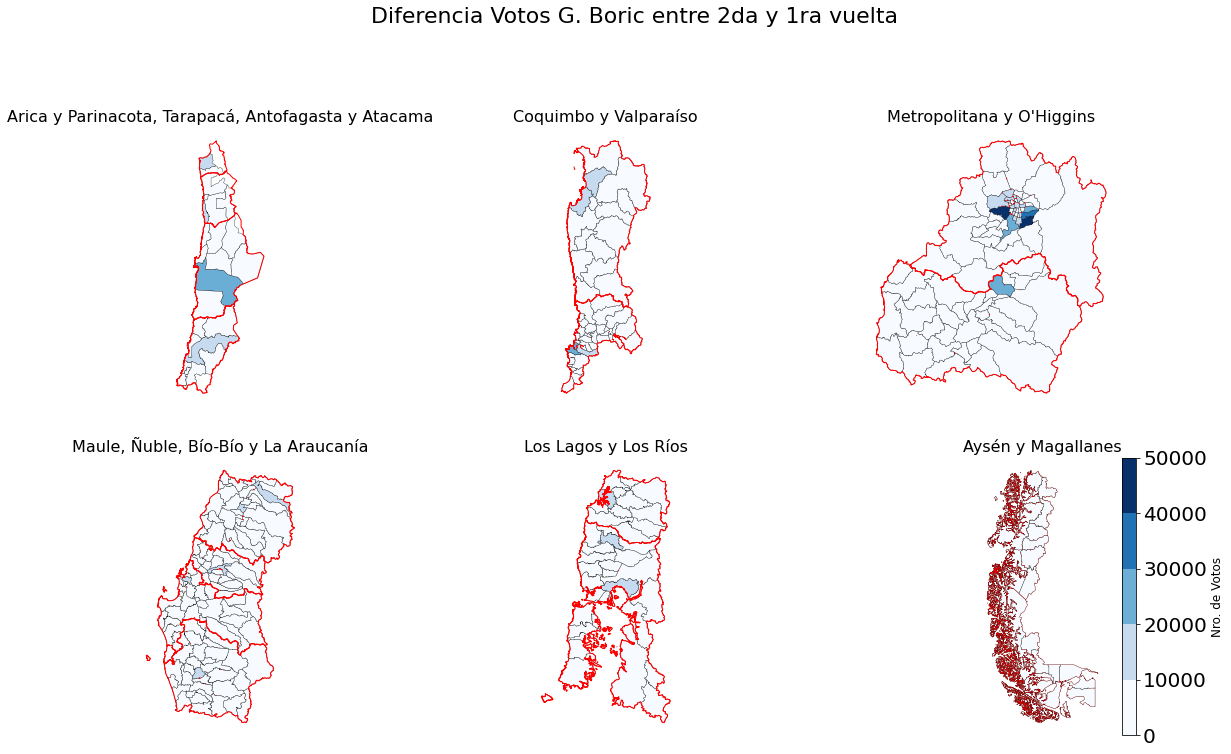

In [743]:
# Cartografia coropleta

fig = plt.figure(figsize=(17,14))
plt.rcParams["font.family"] = "sans-serif"

ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)

gdf_zona1.plot(column='dif', cmap='Blues', scheme='userdefined',
               classification_kwds=dict(bins=[10000, 20000, 30000, 40000, 50000]), 
               edgecolor='black', linewidth=0.3, ax=ax1)
regiones_zona1.plot(linewidth=1, facecolor='None', edgecolor='red', ax=ax1)
gdf_zona2.plot(column='dif', cmap='Blues', scheme='userdefined',
               classification_kwds=dict(bins=[10000, 20000, 30000, 40000, 50000]), 
               edgecolor='black', linewidth=0.3, ax=ax2)
gdf_zona2.dissolve(by='Region').plot(linewidth=1, facecolor='None', edgecolor='red', ax=ax2)
gdf_zona3.plot(column='dif', cmap='Blues', scheme='userdefined',
               classification_kwds=dict(bins=[10000, 20000, 30000, 40000, 50000]), 
               edgecolor='black', linewidth=0.3, ax=ax3)
gdf_zona3.dissolve(by='Region').plot(linewidth=1, facecolor='None', edgecolor='red', ax=ax3)
gdf_zona4.plot(column='dif', cmap='Blues', scheme='userdefined',
               classification_kwds=dict(bins=[10000, 20000, 30000, 40000, 50000]), 
               edgecolor='black', linewidth=0.3, ax=ax4)
gdf_zona4.dissolve(by='Region').plot(linewidth=1, facecolor='None', edgecolor='red', ax=ax4)
gdf_zona5.plot(column='dif', cmap='Blues', scheme='userdefined',
               classification_kwds=dict(bins=[10000, 20000, 30000, 40000, 50000]), 
               edgecolor='black',linewidth=0.3, ax=ax5)
gdf_zona5.dissolve(by='Region').plot(linewidth=1, facecolor='None', edgecolor='red', ax=ax5)
gdf_zona6.plot(column='dif', cmap='Blues', scheme='userdefined',
               classification_kwds=dict(bins=[10000, 20000, 30000, 40000, 50000]), 
               edgecolor='black', linewidth=0.3, ax=ax6)
gdf_zona6.dissolve(by='Region').plot(linewidth=0.15, facecolor='None', edgecolor='red', ax=ax6)

ax1.set_title(titles[0], fontsize=16)
ax2.set_title(titles[1], fontsize=16)
ax3.set_title(titles[2], fontsize=16)
ax4.set_title(titles[3], fontsize=16)
ax5.set_title(titles[4], fontsize=16)
ax6.set_title(titles[5], fontsize=16)

cmap = mpl.cm.Blues
bounds = [0, 10000, 20000, 30000, 40000, 50000]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.rc('xtick', labelsize=12) 
plt.rc('axes', labelsize=12)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax6, location='right', orientation='vertical', label='Nro. de Votos')

fig.suptitle('Diferencia Votos G. Boric entre 2da y 1ra vuelta', fontsize=22, y=1.06)
plt.tight_layout()
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
ax4.set_axis_off()
ax5.set_axis_off()
ax6.set_axis_off()
plt.savefig('../Chile/Elecciones/mapadifvotos.png', dpi=300, bbox_inches='tight', facecolor='none', transparent=True)

##### Comunas con aumento de votos mayor a 20.000

In [578]:
gdf_zona1[gdf_zona1['dif']>20000]

,cod_comuna,Region,Comuna,Provincia,geometry,Boric,Boric2v,dif
11,2101,Región de Antofagasta,ANTOFAGASTA,Antofagasta,"MULTIPOLYGON (((-70.56425 -24.47278, -70.56424...",53151.0,80893,27742.0


In [579]:
gdf_zona2[gdf_zona2['dif']>20000]

,cod_comuna,Region,Comuna,Provincia,geometry,Boric,Boric2v,dif
18,5101,Región de Valparaíso,VALPARAISO,Valparaíso,"POLYGON ((-71.58903 -33.03038, -71.58899 -33.0...",74929.0,99453,24524.0
19,5109,Región de Valparaíso,VINA DEL MAR,Valparaíso,"POLYGON ((-71.54914 -32.94809, -71.54921 -32.9...",69275.0,93427,24152.0


In [580]:
gdf_zona3[gdf_zona3['dif']>20000]

,cod_comuna,Region,Comuna,Provincia,geometry,Boric,Boric2v,dif
10,6101,Región del Libertador Bernardo O'Higgins,RANCAGUA,Cachapoal,"POLYGON ((-70.84385 -34.02929, -70.84371 -34.0...",45735.0,65759,20024.0
21,13122,Región Metropolitana de Santiago,PENALOLEN,Santiago,"POLYGON ((-70.54171 -33.51253, -70.54201 -33.5...",54264.0,74757,20493.0
29,13201,Región Metropolitana de Santiago,PUENTE ALTO,Cordillera,"POLYGON ((-70.50469 -33.54638, -70.50408 -33.5...",115905.0,162880,46975.0
31,13401,Región Metropolitana de Santiago,SAN BERNARDO,Maipo,"POLYGON ((-70.74209 -33.66321, -70.74178 -33.6...",54265.0,77034,22769.0
40,13110,Región Metropolitana de Santiago,LA FLORIDA,Santiago,"POLYGON ((-70.43946 -33.49206, -70.43825 -33.4...",93380.0,124995,31615.0
48,13119,Región Metropolitana de Santiago,MAIPU,Santiago,"POLYGON ((-70.76505 -33.45926, -70.76505 -33.4...",122203.0,167384,45181.0


In [581]:
gdf_zona4[gdf_zona4['dif']>20000]

,cod_comuna,Region,Comuna,Provincia,geometry,Boric,Boric2v,dif


In [582]:
gdf_zona5[gdf_zona5['dif']>20000]

,cod_comuna,Region,Comuna,Provincia,geometry,Boric,Boric2v,dif


In [583]:
gdf_zona6[gdf_zona6['dif']>20000]

,cod_comuna,Region,Comuna,Provincia,geometry,Boric,Boric2v,dif


In [742]:
titles2 = ['Metropolitana','Valparaíso','Bío-Bío',"O'Higgins",'Maule','Coquimbo','Los Lagos','Antofagasta','La Araucanía','Los Ríos',
           'Ñuble','Atacama','Tarapacá','Arica y Parinacota','Magallanes','Aysén']

##### Gráficos de Barras por Regiones

In [629]:
barras = merge_df.groupby('Region')['dif'].sum().sort_values(ascending=False).reset_index()

In [733]:
barras_mean = merge_df.groupby('Region')['dif'].mean().sort_values(ascending=False).reset_index()

In [735]:
barras_mean['reg_abrev'] = titles2

In [736]:
barras_mean['th'] = barras_mean['dif']/1000

In [663]:
barras['th'] = barras['dif']/1000

In [716]:
barras['reg_abrev'] = titles2

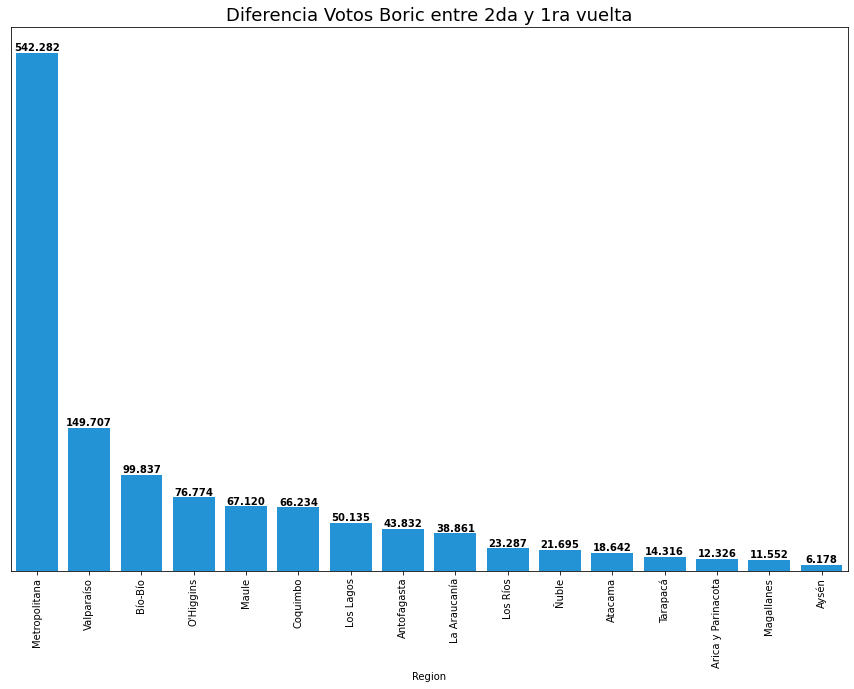

In [744]:
fig = plt.subplots(figsize=(15, 10))
plt.rcParams["font.family"] = "sans-serif"
chart=sns.barplot(x = 'reg_abrev', y = 'th', data = barras, color='xkcd:azure')
chart.bar_label(chart.containers[0],fmt='%.3f', weight='bold')
chart.set(yticklabels=[]) 
chart.set(yticks=[]) 
chart.set(ylabel=None)
plt.xticks(fontsize=10, rotation=90)
plt.xlabel('Region', fontsize=10)
plt.title('Diferencia Votos Boric entre 2da y 1ra vuelta', fontsize=18);
plt.savefig('../Chile/Elecciones/difvotos_regiones.png', dpi=300, bbox_inches='tight', facecolor='none', transparent=True)

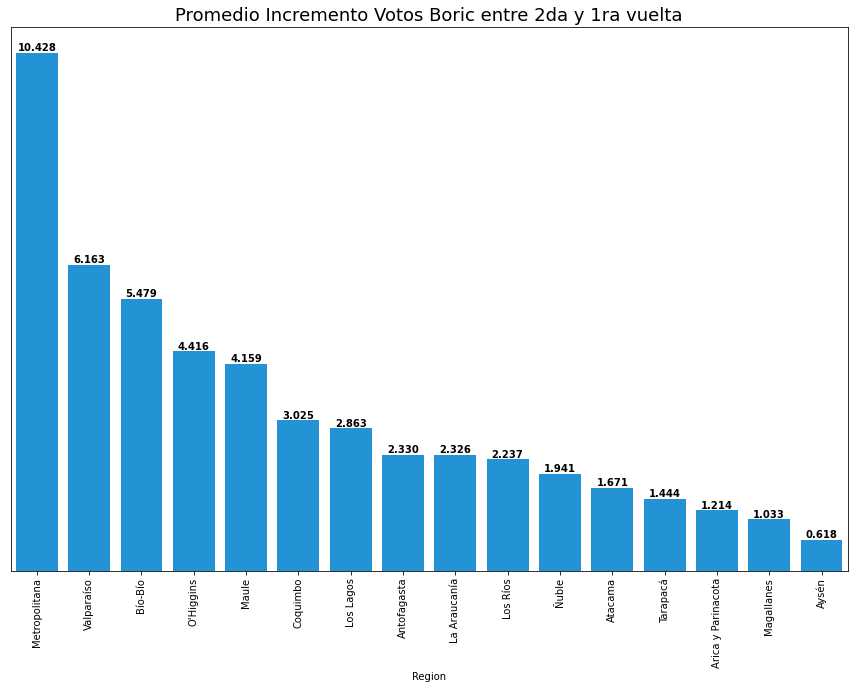

In [745]:
fig = plt.subplots(figsize=(15, 10))
plt.rcParams["font.family"] = "sans-serif"
chart=sns.barplot(x = 'reg_abrev', y = 'th', data = barras_mean, color='xkcd:azure')
chart.bar_label(chart.containers[0],fmt='%.3f', weight='bold')
chart.set(yticklabels=[]) 
chart.set(yticks=[]) 
chart.set(ylabel=None)
plt.xticks(fontsize=10, rotation=90)
plt.xlabel('Region', fontsize=10)
plt.title('Promedio Incremento Votos Boric entre 2da y 1ra vuelta', fontsize=18);
plt.savefig('../Chile/Elecciones/difvotos_promedio_regiones.png', dpi=300, bbox_inches='tight', facecolor='none', transparent=True)